# Einleitung
## Bewegungsvorhersage von Verkehrsteilnehmern
Der Datensatz von Waymo umfasst Positions und Geschwindigkeitsinformationen für Autofahrer, Fahrradfahrer und Fußgänger in 1000 verschiedenen Verkerszenarien. Zu jedem dieser Szenarien ist zudem eine Karte verfügbar. Dies führt zu einer Datenmenge von 620,3 GB Trainingsdaten und 56,3 GB Validierungsdaten.

## Rasterisierung
Diese werden füre ein bildbasierte Weiterverarbeitung in eine 128x128 Pixel große Repräsentation aus Vogelperspektive übertragen.

In [1]:
import os
from os import walk
import numpy as np
import imageio
import scipy.signal
import cv2 as cv
from IPython.display import Image, display
from skimage.transform import rescale

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as animation

GRID_SIZE = 128
DATA_LENGTH = 90

In [2]:
def last_int(x):
    y = x.split("00150_")
    z = y[1].split(".")
    return(int(z[0]))

def load_scenario(n_frames=10):
    """
    load scenarios that were saved using convert_training_data.py
    """
    frames = np.zeros((1, n_frames, GRID_SIZE, GRID_SIZE, 1), dtype=np.float32)

    _, _, filenames = next(walk(PATHNAME + '/static_' + scenario_name))
    temp_frames = np.zeros((DATA_LENGTH, GRID_SIZE, GRID_SIZE, 1), dtype=np.float32)
    
    for filename in sorted(filenames, key = last_int)  :
        image = imageio.imread(PATHNAME + '/static_' + scenario_name + '/' + filename, as_gray=True)
        image = np.reshape(image, (GRID_SIZE,GRID_SIZE,1))
        filename_sections = filename.split('_')
        filename_index, _ = filename_sections[-1].split('.')
        temp_frames[int(filename_index)] = image/255
    
    frames[0] = temp_frames[0:n_frames]

    return frames

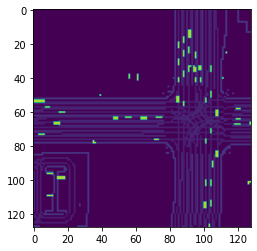

In [3]:
scenario_name = 'tfrecord-00001-of-00150'
PATHNAME = '/media/dev/data/waymo_motion/validation'

input_frames = load_scenario(DATA_LENGTH)

# https://stackoverflow.com/questions/25333732/matplotlib-animation-not-working-in-ipython-notebook-blank-plot
plt.rcParams["animation.html"] = "jshtml"
fig = plt.figure()

ims = []
for i in range(1, 90):
        im = plt.imshow(input_frames[0][i], animated=True)
        ims.append([im])
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
ani